<a href="https://colab.research.google.com/github/devopsopenshift/python/blob/main/Exploratory-analysis/practise-quiz-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install plotly

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import plotly.express as px

In [34]:
data=pd.read_csv('/content/Titanic+Data+Set.csv')
data.shape

(891, 12)

In [185]:
data.duplicated().sum()

0

In [7]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.000,NaN,NaN,NaN,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,NaN,NaN,NaN,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,NaN,NaN,NaN,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.000,NaN,NaN,NaN,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,NaN,NaN,NaN,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,NaN,NaN,NaN,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.000,NaN,NaN,NaN,32.204,49.693,0.000,7.910,14.454,31.000,512.329


In [ ]:
data.info()

In [186]:
# data.shape[0] will give us the number of rows in the dataset
# selecting the instances where missing value is greater than 0
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
Age,177,19.865
Cabin,687,77.104
Embarked,2,0.224
AgeGroup,177,19.865


In [182]:
data.isnull().sum(axis=1).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
SurvivedY        0
AgeGroup       177
dtype: int64

In [20]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
data.drop('Cabin',axis=1,inplace=True)

In [23]:
data.isnull().sum(axis=1).sum()

179

In [148]:
data['SurvivedY']=data['Survived'].apply(lambda x: 'Survived' if (x==1) else 'Not Survived')

<Axes: xlabel='Sex', ylabel='Age'>

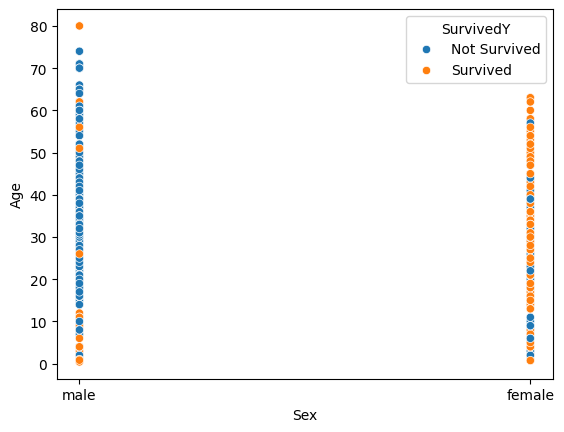

In [149]:
sns.scatterplot(data=data, x='Sex', y='Age',hue='SurvivedY')

In [150]:
px.histogram(data,x='Parch').show()

<Axes: xlabel='AgeGroup', ylabel='count'>

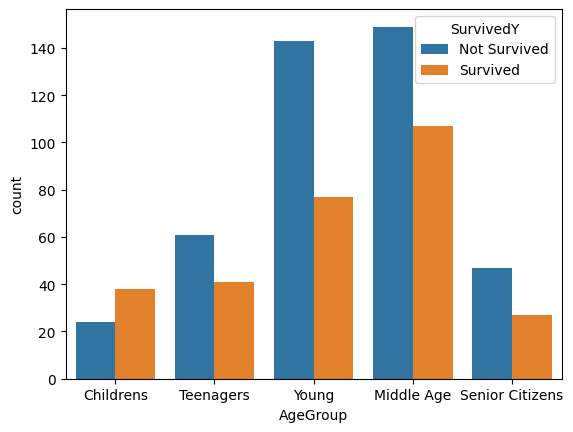

In [162]:
data['AgeGroup'] = pd.cut(data['Age'],bins=[0,10,20,30,50,100],labels=['Childrens','Teenagers','Young','Middle Age','Senior Citizens'], right = False)

sns.countplot(data=data, x='AgeGroup',hue='SurvivedY')

In [169]:
data[data['SurvivedY']=='Survived'].groupby(['Pclass']).count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedY,AgeGroup
Pclass,,,,,,,,,,,,,
1,136,136,136,136,122,136,136,136,136,117,134,136,122
2,87,87,87,87,83,87,87,87,87,13,87,87,83
3,119,119,119,119,85,119,119,119,119,6,119,119,85


In [174]:
data[data['SurvivedY']=='Survived'].groupby(['Pclass'])['PassengerId'].count()/data[data['SurvivedY']=='Not Survived'].groupby(['Pclass'])['PassengerId'].count()

Pclass
1   1.700
2   0.897
3   0.320
Name: PassengerId, dtype: float64

<Axes: xlabel='Embarked', ylabel='count'>

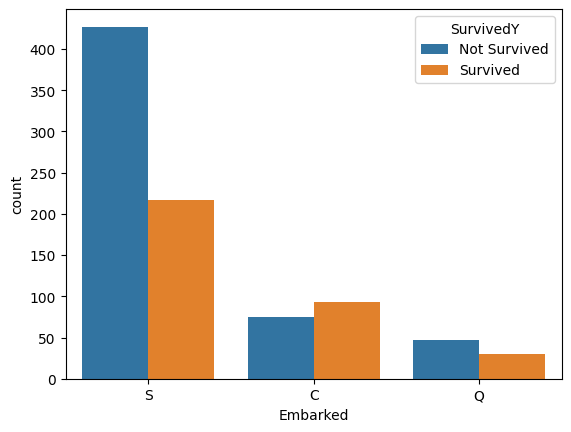

In [176]:
sns.countplot(data=data, x='Embarked',hue='SurvivedY')

In [49]:
px.scatter_3d(data, x='Cabin', y='Age',z='Sex',color='Survived').show()


<Axes: xlabel='Sex', ylabel='Fare'>

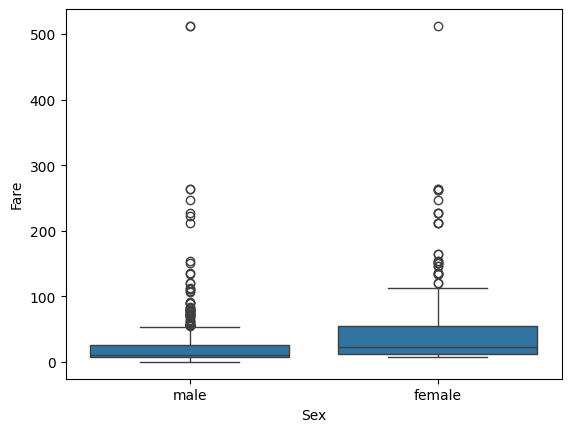

In [179]:
sns.boxplot(data, x="Sex", y="Fare")

In [181]:
px.box(data, x="Sex", y="Fare").show()